# Scratchpad Environment

Configured for fast testing implementations.

----
```
author:             Zach Wolpe
email:              zach.wolpe@medibio.com.au
date:               05 July 2022
reviewed:           n/a
```
----

In [13]:
import pandas as pd
import json

input_data = [
    {"Gender":  "Male",     "HeightCm": 171, "WeightKg": 96 },
    { "Gender": "Male",     "HeightCm": 161, "WeightKg": 85 },
    { "Gender": "Male",     "HeightCm": 180, "WeightKg": 77 },
    { "Gender": "Female",   "HeightCm": 166, "WeightKg": 62},
    {"Gender":  "Female",   "HeightCm": 150, "WeightKg": 70},
    {"Gender":  "Female",   "HeightCm": 167, "WeightKg": 82}
    ]
input_data


# store
with open('data.json', 'w') as f:
    json.dump(input_data, f)


In [2]:
# packages
from datetime import datetime
import pandas as pd
import numpy as np
import pickle

# modules
from BMI_computation import *
from tests import * 

In [20]:
json.__version__

'2.0.9'

In [3]:
t = tests(input_data)
t.test_entries()
t.test_datatypes()
t.correct_idx()
t.filter_data()

failed to parse entry at index: 6
Exception: 'set' object is not subscriptable


---------------------------------------------------------------------------------------------------++
Execution BMI computation
Executed successfully.
Saved successfully.
Runtime: 0:00:00.539026
---------------------------------------------------------------------------------------------------++


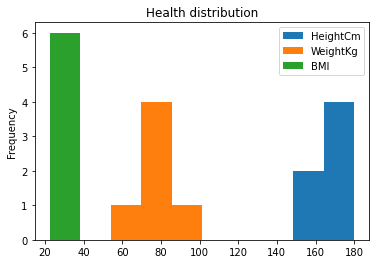

In [4]:
BMI_computation(t.filtered_data)

----
# Rough Work
----

# Unit tests & Expectations
- check the data input
- store a list of indices of incorrect inputs
- store a list of indices of data the violates expectations

In [68]:
import numpy as np

In [127]:

class tests:
    def __init__(self, data, expected_cols=['Gender', 'HeightCm', 'WeightKg']):
        self.data               = data
        self.expected_cols      = expected_cols
        self.correct_columns    = [True for _ in range(len(data))]
        self.correct_dtypes     = [True for _ in range(len(data))]
        self.idx                = None

    def test_entries(self):
        idx = []
        for d in self.data:
            x = np.mean([c in d for c in self.expected_cols]) == 1
            idx.append(x)
        self.correct_columns = idx
        

    def test_datatypes(self, expected_types=[str, int, int]):
        idx = []
        for i, d in enumerate(self.data):
            try:
                x = np.mean([isinstance(d[c], e) for c,e in zip(self.expected_cols, expected_types)]) == 1
                idx.append(x)
            except Exception as e:
                print(f'failed to parse entry at index: {i}')
                print('Exception:', e)
                idx.append(False)
        self.correct_dtypes = idx

    def correct_idx(self):
        self.idx = [i and j for i,j in zip(self.correct_columns, self.correct_dtypes)]

    def filter_data(self):
        self.filtered_data = [d for d,i in zip(self.data, self.idx) if i]

        

In [130]:
t = tests(input_data)
t.test_entries()
t.test_datatypes()
t.correct_idx()
t.filter_data()
t.filtered_data

failed to parse entry at index: 6
Exception: 'set' object is not subscriptable


[{'Gender': 'Male', 'HeightCm': 171, 'WeightKg': 96},
 {'Gender': 'Male', 'HeightCm': 161, 'WeightKg': 85},
 {'Gender': 'Male', 'HeightCm': 180, 'WeightKg': 77},
 {'Gender': 'Female', 'HeightCm': 166, 'WeightKg': 62},
 {'Gender': 'Female', 'HeightCm': 150, 'WeightKg': 70},
 {'Gender': 'Female', 'HeightCm': 167, 'WeightKg': 82}]

In [ ]:
import pickle
from datetime import datetime

class BMI_computation:
    def __init__(self, data, prints=True):
        
        # Hyperparameters ----------------------------------------------------------------------------------------++
        self.data           = data
        self.start_time     = datetime.now()
        self.BMI_categories = {
        18.4:   {'BMI Category':'Underweight',              'Health risk':'Malnutrition risk'},
        24.9:   {'BMI Category':'Normal weight',            'Health risk':'Low risk'},
        29.9:   {'BMI Category':'Overweight',               'Health risk':'Enhanced risk'},
        34.9:   {'BMI Category':'Moderately obese',         'Health risk':'Medium risk'},
        39.9:   {'BMI Category':'Severly obese',            'Health risk':'High risk'},
        999999: {'BMI Category':'Very severely obese',      'Health risk':'Very high risk'}}
        if prints:
            print('---------------------------------------------------------------------------------------------------++')
            print('Execution BMI computation')
        # Hyperparameters ----------------------------------------------------------------------------------------++

        # Execute ------------------------------------------------------------------------------------------------++
        try:
            mp  = list(map(self.compute_BMI, enumerate(self.data)))
            mp  = [m for m in mp if m is not None]
            df  = pd.DataFrame(mp)
            fig = df.plot(kind='hist', title='Health distribution').get_figure()
            if prints:
                print('Executed successfully.')
        except Exception as e:
            print('failed to execute module.')
            print(f'Exception: {e}')
        # Execute ------------------------------------------------------------------------------------------------++

        # Store --------------------------------------------------------------------------------------------------++
        try:
            fig.savefig('health_distribution.pdf')
            df.to_csv('processed_dataframe.csv')
            with open('processed_data.pkl', 'wb') as f:
                pickle.dump(mp, f)
            self.end_time = datetime.now()
            if prints:
                print('Saved successfully.')
                print('Runtime: {}'.format(self.end_time - self.start_time))
                print('---------------------------------------------------------------------------------------------------++')
        except Exception as e:
            print('failed to save module.')
            print(f'Exception: {e}')


        # Store --------------------------------------------------------------------------------------------------++

    def switcher(self, bmi):
        for key,val in self.BMI_categories.items():
            if bmi <= key:
                return val['BMI Category'], val['Health risk']
            

    def compute_BMI(self,i,d):
        bmi                         = d['WeightKg']/((d['HeightCm']/100)**2)
        bmi_category, health_risk   = switcher(bmi)
        return i, bmi, bmi_category, health_risk

    def compute_BMI(self, id):
        try:
            i, d                        = id
            result                      = d.copy()
            bmi                         = d['WeightKg']/((d['HeightCm']/100)**2)
            bmi_category, health_risk   = switcher(bmi)
            result['BMI']               = bmi
            result['BMI Categories']    = bmi_category
            result['Health risk']       = health_risk
            return result
        except:
            print(f'failed to parse entry at index: {i}')
            return None

In [13]:
BMI_categories = {
    18.4:   {'BMI Category':'Underweight',              'Health risk':'Malnutrition risk'},
    24.9:   {'BMI Category':'Normal weight',            'Health risk':'Low risk'},
    29.9:   {'BMI Category':'Overweight',               'Health risk':'Enhanced risk'},
    34.9:   {'BMI Category':'Moderately obese',         'Health risk':'Medium risk'},
    39.9:   {'BMI Category':'Severly obese',            'Health risk':'High risk'},
    999999: {'BMI Category':'Very severely obese',      'Health risk':'Very high risk'},
}


def switcher(bmi, BMI_categories=BMI_categories):
    for key,val in BMI_categories.items():
        if bmi <= key:
            return val['BMI Category'], val['Health risk']
            

def compute_BMI(i,d):
    bmi                         = d['WeightKg']/((d['HeightCm']/100)**2)
    bmi_category, health_risk   = switcher(bmi)
    return i, bmi, bmi_category, health_risk


In [19]:
def compute_BMI(id):
    try:
        i, d                        = id
        result                      = d.copy()
        bmi                         = d['WeightKg']/((d['HeightCm']/100)**2)
        bmi_category, health_risk   = switcher(bmi)
        result['BMI']               = bmi
        result['BMI Categories']    = bmi_category
        result['Health risk']       = health_risk
        return result
    except:
        print(f'failed to parse entry at index: {i}')
        return None
        


mp = list(map(compute_BMI, enumerate(input_data)))
mp = [m for m in mp if m is not None]
# mp

failed to parse entry at index: 6


In [20]:
df = pd.DataFrame(mp)

# sum(df['BMI Categories'] == 'Overweight')

,Gender,HeightCm,WeightKg,BMI,BMI Category,Health risk,BMI Categories
0,Male,171,96,32.830615,Moderately obese,Medium risk,Moderately obese
1,Male,161,85,32.791945,Moderately obese,Medium risk,Moderately obese
2,Male,180,77,23.765432,Normal weight,Low risk,Normal weight
3,Female,166,62,22.499637,Normal weight,Low risk,Normal weight
4,Female,150,70,31.111111,Moderately obese,Medium risk,Moderately obese
5,Female,167,82,29.402273,Overweight,Enhanced risk,Overweight


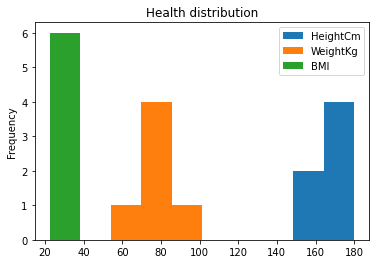

In [33]:
# import matplotlib as plt
# df['BMI'].hist(bins=100, label='s')
df = pd.DataFrame(mp)
fig = df.plot(kind='hist', title='Health distribution').get_figure()
fig.savefig('health_distribution.pdf')

24.489795918367346